# Creating a Dataset

This is the final stage of the pipeline, so you should have a ~/seals_geo_survey/images directory containing images that have already been filtered through the img_prep.py script and classified by the image classification models. 

If this is the case, then creating your dataset is as simple as running create_dataset.py with the images directory as the only argument:

```
python create_dataset.py ~/seals_geo_survey/images
```

This will create seal_dataset.csv which contains an entry for every image that has been classified as some sort of seal. Here is some sample code that creates a basic visualization of the data. 

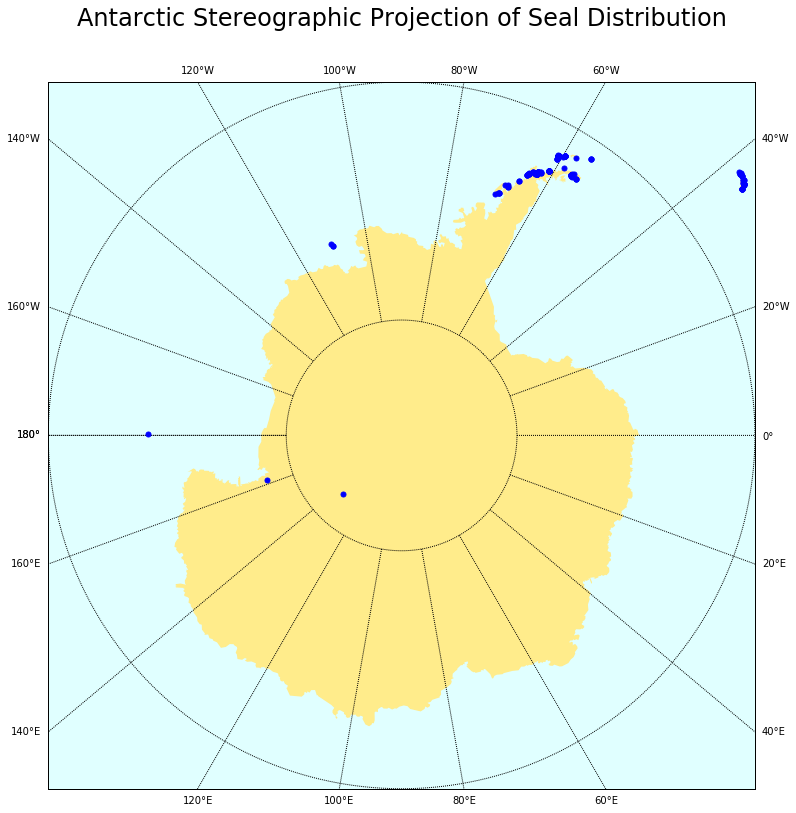

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('seal_dataset.csv')
plt.figure(figsize=(21,13))
m = Basemap(projection='spstere',boundinglat=-60,lon_0=90,resolution='l')
m.fillcontinents(color='#FFEC8B',lake_color='aqua')
m.drawmapboundary(fill_color='lightcyan')
m.drawparallels(np.arange(-80.,81.,20.),labels=[True,False,False,True])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,True,True,True])
for index, row in df.iterrows():
    x,y = m(row['Longitude'], row['Latitude'])
    m.plot(x, y, 'bo', markersize=5)
ax = plt.gca()
plt.text(0.5, 1.08, "Antarctic Stereographic Projection of Seal Distribution",
         horizontalalignment='center',
         fontsize=24,
         transform = ax.transAxes)
plt.show()